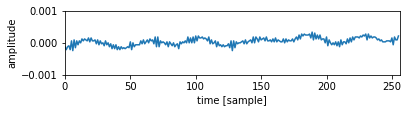

In [39]:
#coding:utf-8
import wave
import numpy as np
import scipy.fftpack
from pylab import *
import matplotlib.pyplot as plt

if __name__ == "__main__" :
    wf = wave.open("test_1.wav" , "r" )
    fs = wf.getframerate()  # サンプリング周波数
    x = wf.readframes(wf.getnframes())
    x = frombuffer(x, dtype= "int16") / 32768.0  # -1 - +1に正規化
    wf.close()

    start = 0  # サンプリングする開始位置
    N = 256# FFTのサンプル数

    X = np.fft.fft(x[start:start+N])  # FFT
#    X = scipy.fftpack.fft(x[start:start+N])         # scipy版

    freqList = np.fft.fftfreq(N, d=1.0/fs)  # 周波数軸の値を計算
#    freqList = scipy.fftpack.fftfreq(N, d=1.0/ fs)  # scipy版

    amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X]  # 振幅スペクトル
    phaseSpectrum = [np.arctan2(int(c.imag), int(c.real)) for c in X]    # 位相スペクトル

    # 波形を描画
    subplot(311)  # 3行1列のグラフの1番目の位置にプロット
    plot(range(start, start+N), x[start:start+N])
    axis([start, start+N, -0.001, 0.001])
    xlabel("time [sample]")
    ylabel("amplitude")
    

    


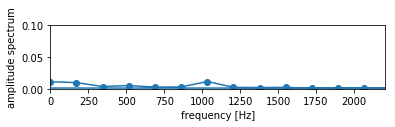

In [40]:
    # 振幅スペクトルを描画
    subplot(312)
    plot(freqList, amplitudeSpectrum, marker= 'o', linestyle='-')
    axis([0, fs/20, 0, 0.1])
    xlabel("frequency [Hz]")
    ylabel("amplitude spectrum")
    print("")

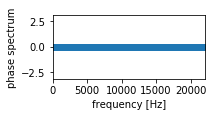

In [41]:
    # 位相スペクトルを描画
    subplot(323)
    plot(freqList, phaseSpectrum, marker= 'o', linestyle='-')
    axis([0, fs/2, -np.pi, np.pi])
    xlabel("frequency [Hz]")
    ylabel("phase spectrum")

    show()